<a href="https://colab.research.google.com/github/Faara34/TelecomChurnMl/blob/main/CwMl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
df = pd.read_csv('/content/drive/MyDrive/ML_CW_Sem01/WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [28]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
df.shape




(7043, 21)

In [30]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [31]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
#checking datatypes and missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [33]:
#noticed that totalcharges is considered as an object therefore coverted to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [34]:
#checking the churn distribution
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [35]:
#convering the yes and or for numeric to plot
#convering 0 and 1 for yes and no
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})


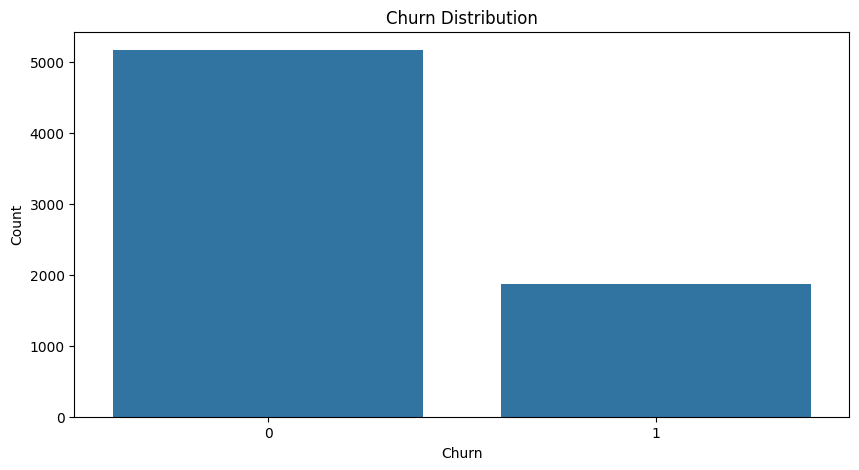

In [36]:
#churn distribution plot
plt.figure(figsize=(10,5))
sns.countplot(x='Churn',data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [37]:
#seeing the numerical colomns
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [38]:
target = 'Churn' #removing 'Churn'
if target in num_cols:
    num_cols.remove(target)


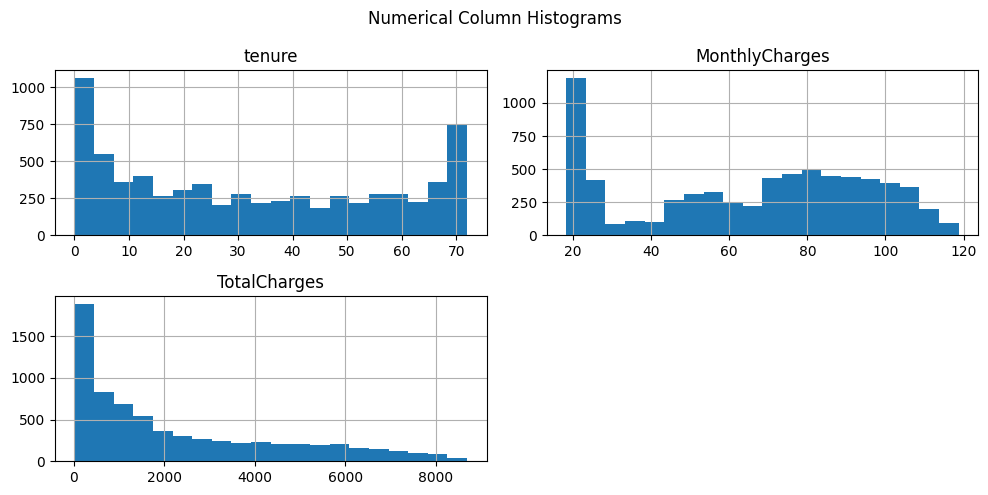

In [39]:
#histograms for numerical colomns
df[num_cols].hist(figsize=(10,5),bins=20)
plt.suptitle('Numerical Column Histograms')
plt.tight_layout()
plt.show()

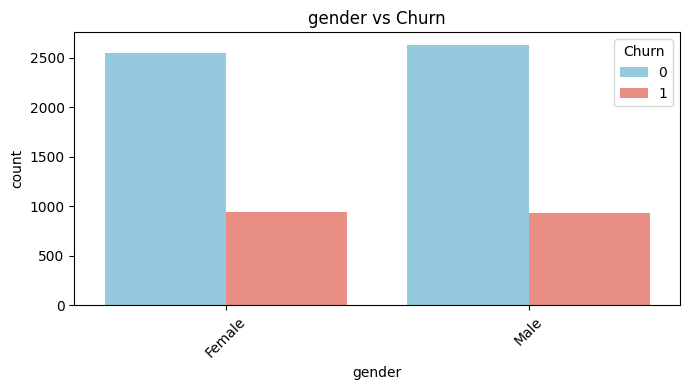

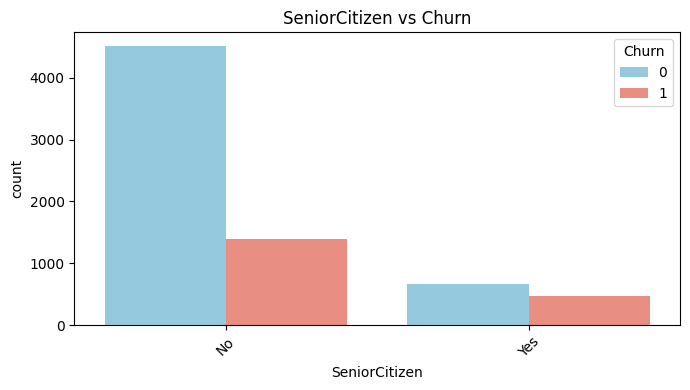

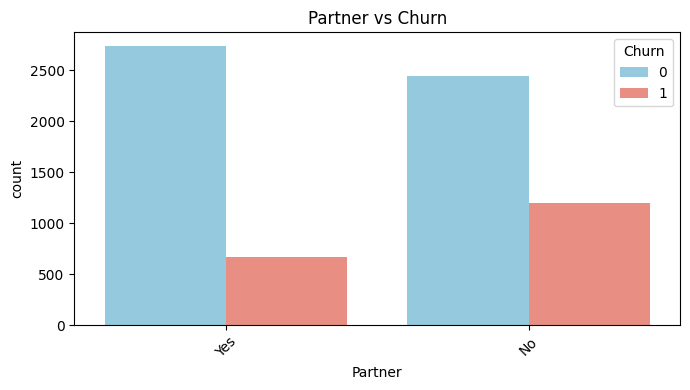

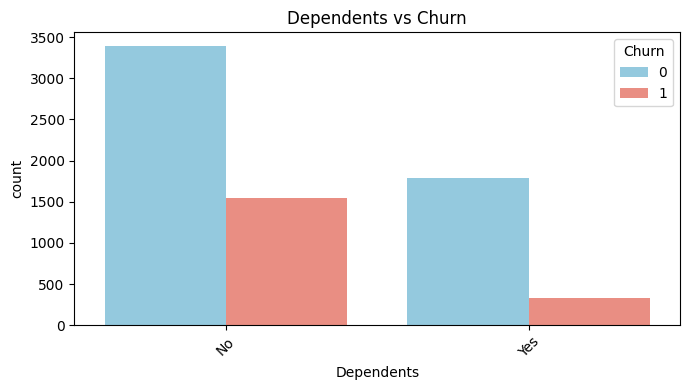

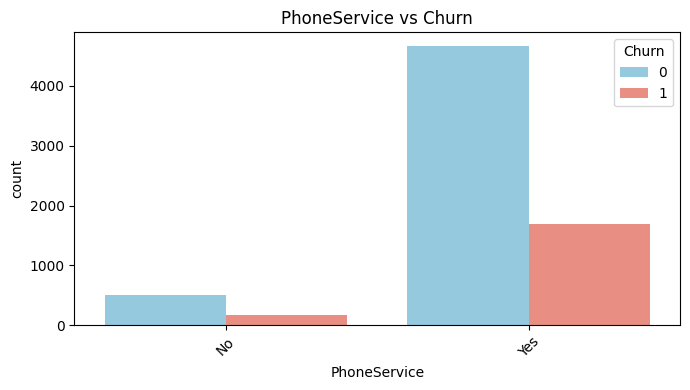

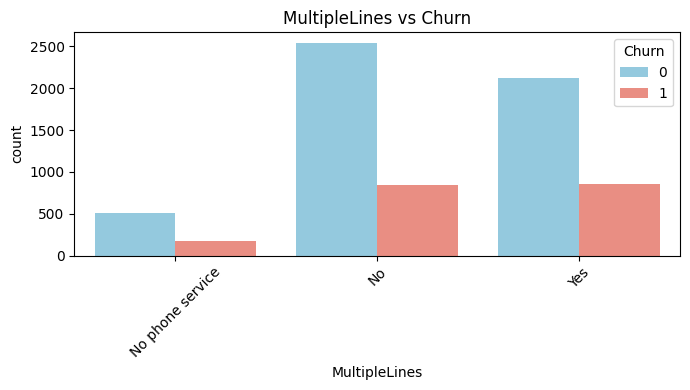

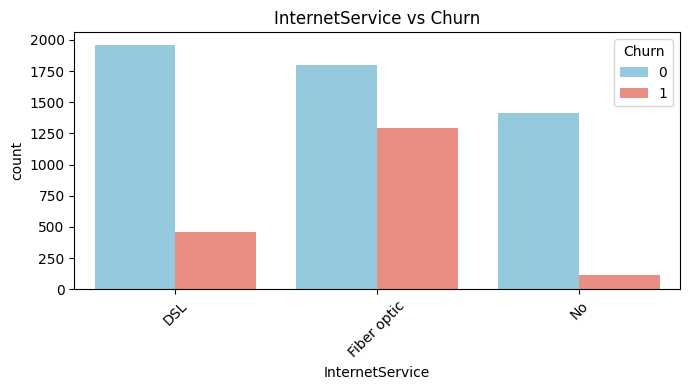

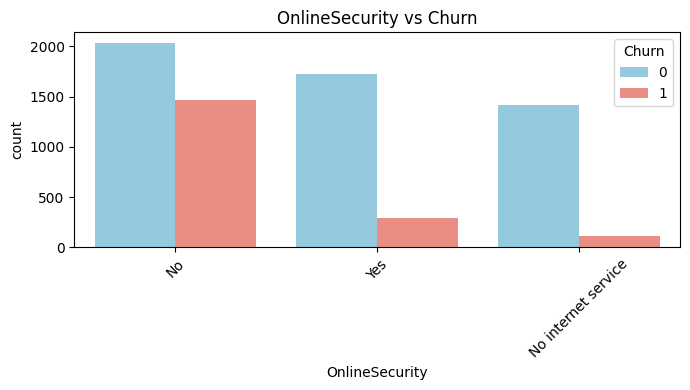

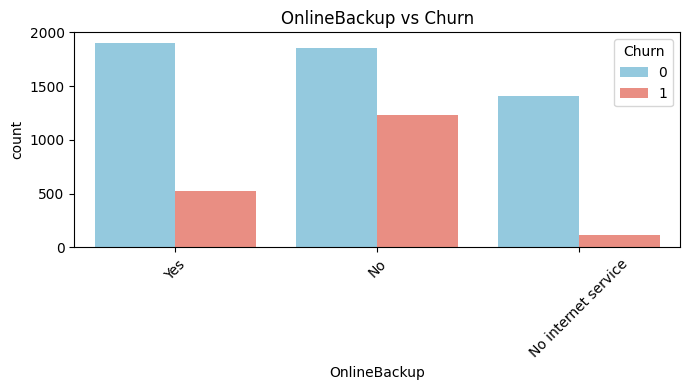

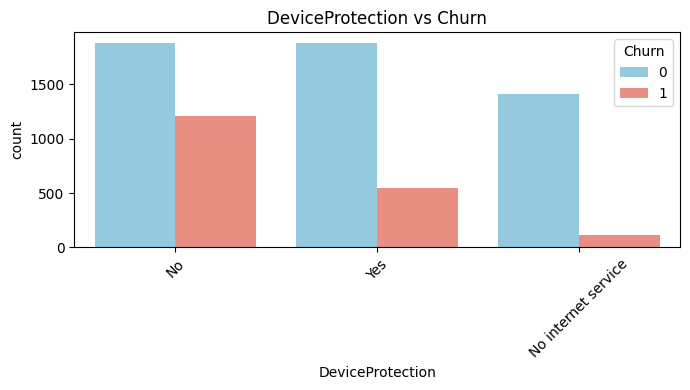

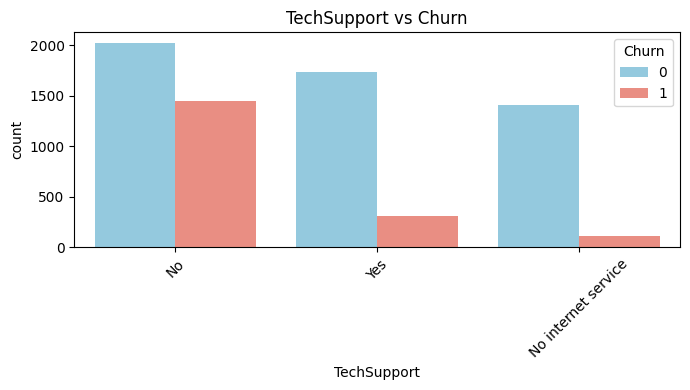

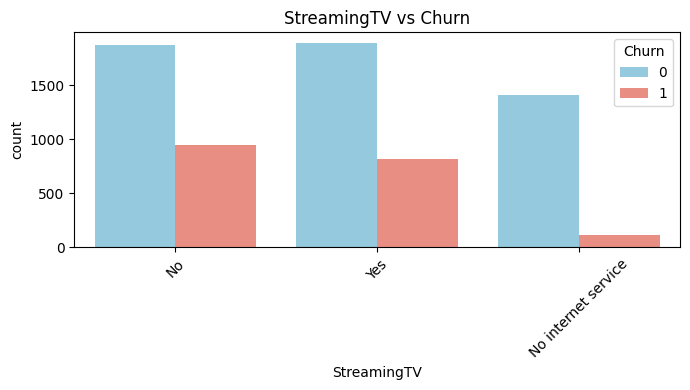

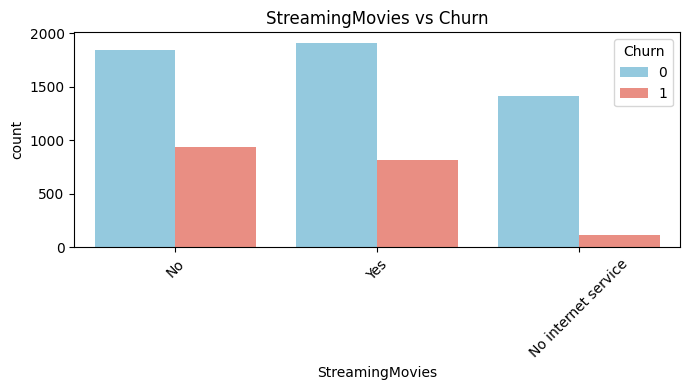

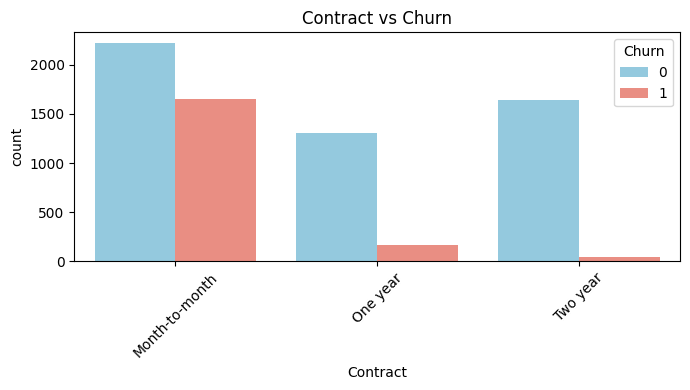

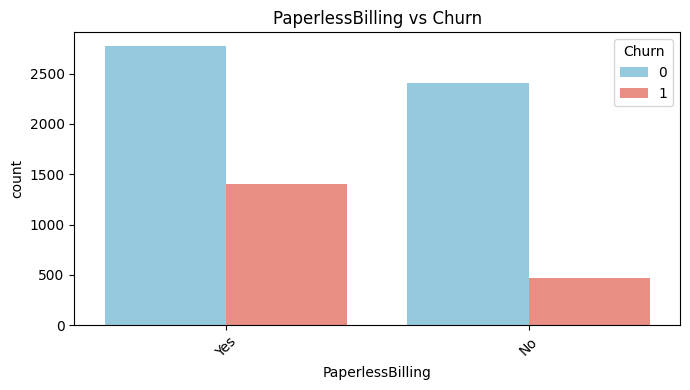

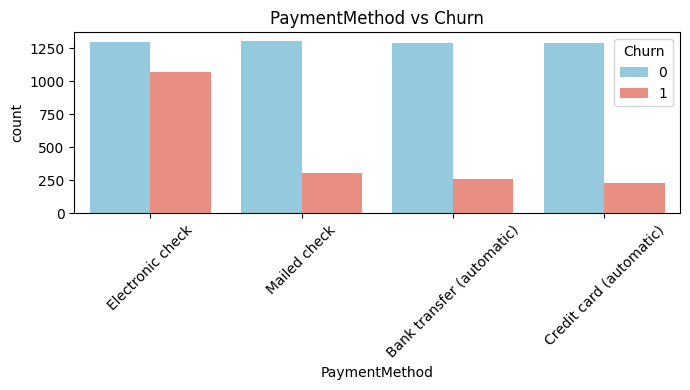

In [40]:
#categorical vs churn
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols
idcolomn = 'customerID' #removing customerid from categorical
if idcolomn in cat_cols:
    cat_cols.remove(idcolomn)


for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, hue='Churn', data=df,palette={0:'skyblue',1:'salmon'})
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Churn")
    plt.tight_layout()
    plt.show()
#customer stayed - 0 No

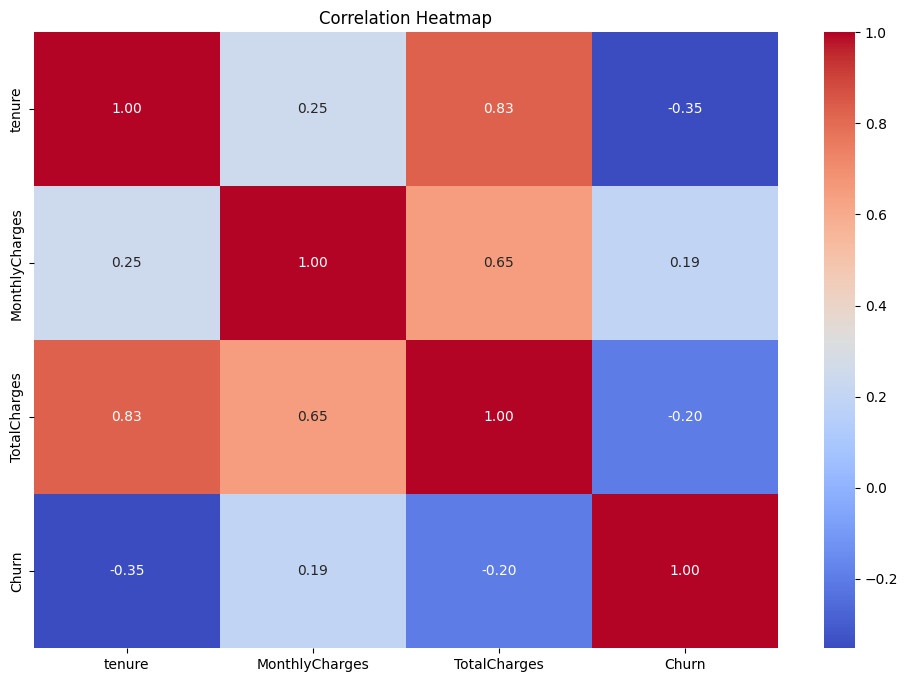

In [45]:
plt.figure(figsize=(12,8))
corr_cols = num_cols + [target]
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


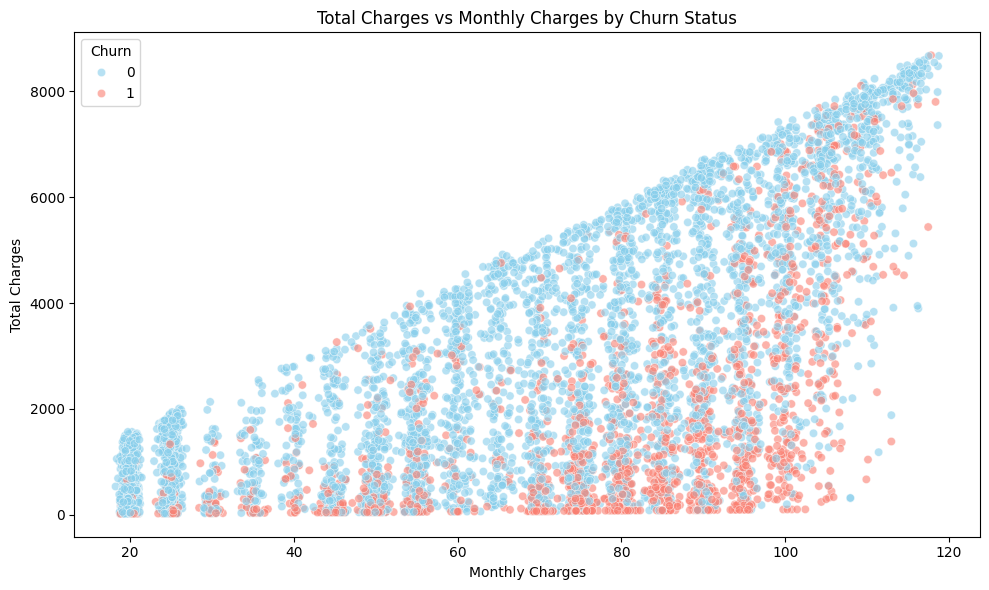

In [42]:
#MonthlyCharges vs TotalCharges

plt.figure(figsize=(10,6))
sns.scatterplot(
        data=df,
        x='MonthlyCharges',
        y='TotalCharges',
        hue='Churn',
        palette={0:'skyblue',1:'salmon'},
        alpha=0.6
)

plt.title('Total Charges vs Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

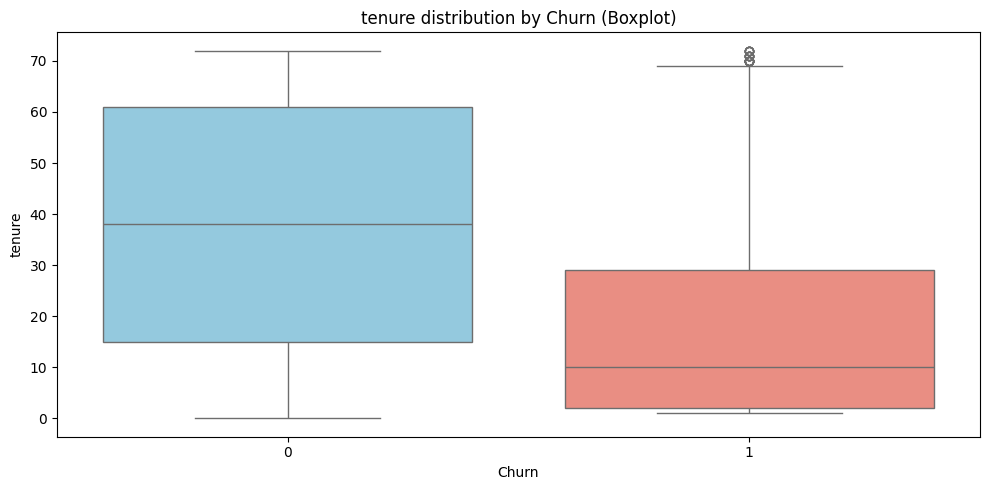

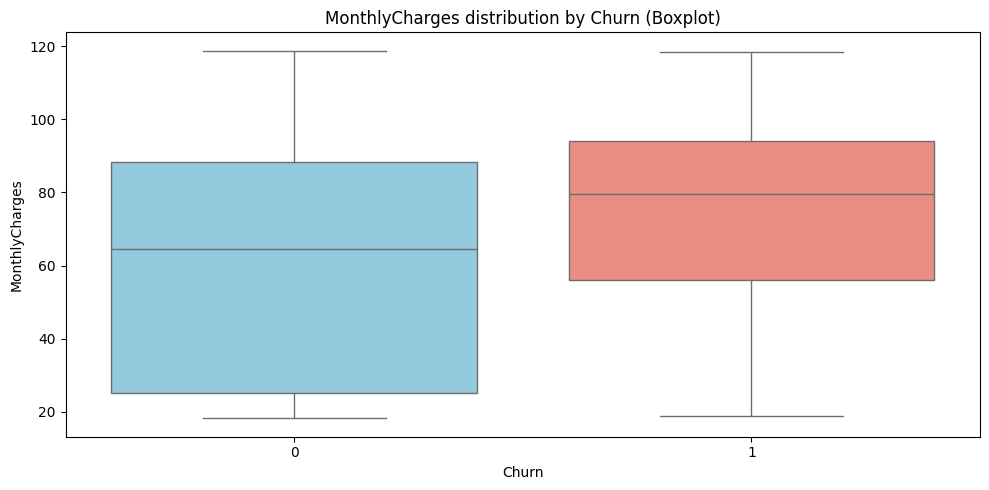

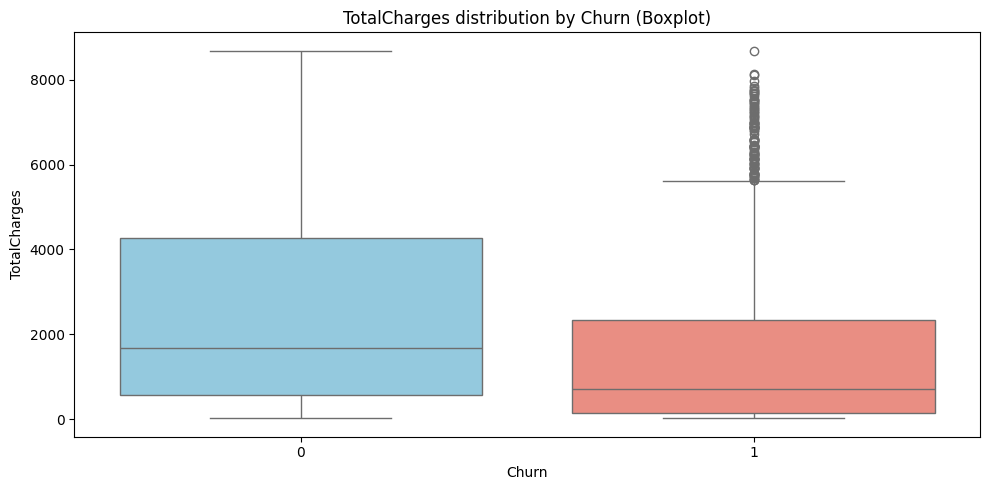

In [43]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in num_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='Churn', y=col, data=df,palette={'0':'skyblue','1':'salmon'} )
    plt.title(f'{col} distribution by Churn (Boxplot)')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()